# Homework 5 - The Marvel Universe!

In [1]:
# importing libraries that we needed.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from tkinter import _flatten
import numpy as np

## 1. Data

We imported the datasets for the questions in ADM HW-5.

In [3]:
nodes=pd.read_csv('nodes.csv')

In [4]:
edges=pd.read_csv('edges.csv')

In [5]:
hero_net=pd.read_csv('hero-network.csv')

In [6]:
#Contains two columns (node, type), indicating the nodes' name and type (comic, hero).

nodes.head(5)

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero


In [7]:
#Contains two columns (hero, comic), indicating which comics the heroes appear in.

edges.head(5)

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


In [8]:
#Contains the network of heroes who have appeared together in the comics.

hero_net.head(5)

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


## Data preprocessing

#### 1-To overcome inconsistencies in the data, 

#### a-We deleted extra spaces at the end of the heroes' names in "hero_network.csv" file, compared to their names in "edges.csv".

In [10]:
hero_net.head()

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [11]:
print("in the column 'hero1', Number of rows that has an extra space at the end of the hero name is",len(hero_net.loc[hero_net['hero1'].str.endswith(' ')]))

in the column 'hero1', Number of rows that has an extra space at the end of the hero name is 75735


In [12]:
print("in the column 'hero2', Number of rows that has an extra space at the end of the hero name is",len(hero_net.loc[hero_net['hero2'].str.endswith(' ')]))

in the column 'hero2', Number of rows that has an extra space at the end of the hero name is 73556


We created a new dataframe after deleting extra spaces at hero names, named the new hero network dataframe as "hero_net_pp".

In [13]:
hero_net_pp = pd.DataFrame(columns=['hero1', 'hero2'])

hero_net_pp['hero1']=hero_net['hero1'].str.rstrip(' ')
hero_net_pp['hero2']=hero_net['hero2'].str.rstrip(' ')

In [14]:
print("in the column 'hero1', Number of rows that has an extra space at the end of the hero name is",len(hero_net_pp.loc[hero_net_pp['hero1'].str.endswith(' ')]))

in the column 'hero1', Number of rows that has an extra space at the end of the hero name is 0


In [15]:
print("in the column 'hero2', Number of rows that has an extra space at the end of the hero name is",len(hero_net_pp.loc[hero_net_pp['hero2'].str.endswith(' ')]))

in the column 'hero2', Number of rows that has an extra space at the end of the hero name is 0


#### b- We deleted extra "/" at the end of some heroes' names in "hero_network.csv" file, compared to their names in "edges.csv"

In [16]:
print("in the column 'hero1', Number of rows that has an extra space at the end of the hero name is",len(hero_net_pp.loc[hero_net_pp['hero1'].str.endswith('/')]))

in the column 'hero1', Number of rows that has an extra space at the end of the hero name is 15323


In [17]:
print("in the column 'hero2', Number of rows that has an extra space at the end of the hero name is",len(hero_net_pp.loc[hero_net_pp['hero2'].str.endswith('/')]))

in the column 'hero2', Number of rows that has an extra space at the end of the hero name is 15520


In [18]:
hero_net_pp['hero1']=hero_net_pp['hero1'].str.rstrip('/')
hero_net_pp['hero2']=hero_net_pp['hero2'].str.rstrip('/')

In [19]:
print("in the column 'hero1', Number of rows that has an extra space at the end of the hero name is",len(hero_net_pp.loc[hero_net_pp['hero1'].str.endswith('/')]))
print("in the column 'hero2', Number of rows that has an extra space at the end of the hero name is",len(hero_net_pp.loc[hero_net_pp['hero2'].str.endswith('/')]))

in the column 'hero1', Number of rows that has an extra space at the end of the hero name is 0
in the column 'hero2', Number of rows that has an extra space at the end of the hero name is 0


#### c- The hero name 'SPIDER-MAN/PETER PAR' in 'hero-network.csv' (due to a string length limit), has been changed  as 'SPIDER-MAN/PETER PARKER' as like as in 'edges.csv' 

In [20]:
hero_net_pp.loc[hero_net_pp['hero1'] == 'SPIDER-MAN/PETER PAR'] 

,hero1,hero2
398,SPIDER-MAN/PETER PAR,FIRESTAR/ANGELICA JO
399,SPIDER-MAN/PETER PAR,THUNDERBALL/DR. ELIO
400,SPIDER-MAN/PETER PAR,NAMORITA/NITA PRENTI
401,SPIDER-MAN/PETER PAR,SPEEDBALL/ROBBIE BAL
402,SPIDER-MAN/PETER PAR,HULK/DR. ROBERT BRUC
...,...,...
574356,SPIDER-MAN/PETER PAR,MAGMA/AMARA AQUILLA
574357,SPIDER-MAN/PETER PAR,SCARLET WITCH/WANDA
574358,SPIDER-MAN/PETER PAR,MAGIK/ILLYANA RASPUT
574359,SPIDER-MAN/PETER PAR,CAPTAIN AMERICA


In [21]:
hero_net_pp = hero_net_pp.apply(lambda x: x.replace({'SPIDER-MAN/PETER PAR':'SPIDER-MAN/PETER PARKER'}, regex=True))

In [22]:
#to check the dataset, after we replaced heroes names. 
hero_net_pp.loc[hero_net_pp['hero2'] == 'SPIDER-MAN/PETER PARKER'] 

,hero1,hero2
397,NOVA/RICHARD RIDER,SPIDER-MAN/PETER PARKER
1505,"STACY, PAUL",SPIDER-MAN/PETER PARKER
1510,"STACY, JILL",SPIDER-MAN/PETER PARKER
1514,"STACY, ARTHUR",SPIDER-MAN/PETER PARKER
1517,"PARKER, MAY",SPIDER-MAN/PETER PARKER
...,...,...
574271,NIGHTCRAWLER/KURT WA,SPIDER-MAN/PETER PARKER
574291,SUNSPOT/ROBERTO DACO,SPIDER-MAN/PETER PARKER
574310,STORM/ORORO MUNROE S,SPIDER-MAN/PETER PARKER
574328,MIRAGE II/DANIELLE M,SPIDER-MAN/PETER PARKER


#### 2- Some entries in the 'hero-network.csv' have the same hero in both columns. In the graph, because a self-loop makes no sense in this network, We removed those from the dataset.

In [23]:
hero_net_pp.loc[hero_net_pp['hero1'] == hero_net_pp['hero2']].value_counts() 

hero1                 hero2               
PATRIOT/JEFF MACE     PATRIOT/JEFF MACE       1275
MISS AMERICA/MADELIN  MISS AMERICA/MADELIN     672
BUCKY/BUCKY BARNES    BUCKY/BUCKY BARNES       120
CAPTAIN AMERICA       CAPTAIN AMERICA          120
WHIZZER/ROBERT L. FR  WHIZZER/ROBERT L. FR      37
RAVONNA LEXUS RENSLA  RAVONNA LEXUS RENSLA       2
BLUE DIAMOND/PROFESS  BLUE DIAMOND/PROFESS       1
DR. STRANGE DOPPELGA  DR. STRANGE DOPPELGA       1
FIN/PETER NOBLE       FIN/PETER NOBLE            1
SILVER SCORPION/ELIS  SILVER SCORPION/ELIS       1
SUB-MARINER/NAMOR MA  SUB-MARINER/NAMOR MA       1
VINDICATOR II DOPPEL  VINDICATOR II DOPPEL       1
dtype: int64

In [25]:
#Removing self loop
hero_net_pp.drop(hero_net_pp.index[(hero_net_pp["hero1"] == hero_net_pp['hero2'] )],axis=0,inplace=True)

In [26]:
hero_net_pp.loc[hero_net_pp['hero1'] == hero_net_pp['hero2']].value_counts() 

Series([], dtype: int64)

### Graphs setup

### First graph
Will be constructed using the data stored in the 'hero-network.csv' file, in which an edge between two heroes can be found if they have appeared in the same comic together. The number of edges between two heroes represents the number of times they have collaborated in different comics. 

###### The graph should be considered weighted and undirected. 
It is up to you to decide which metric to use to calculate the weights, but we anticipate that the cost will be lower for heroes with more collaborations. Please specify which metric you used to select the weights in the report.


#TEST DATA
herodata={'hero1':['H1','H1','H1'],
      'hero2':['H2','H2','H3']}

heroframe=pd.DataFrame(herodata)

heroframe['weight'] = heroframe.groupby(['hero1', 'hero2'])['hero1'].transform('size')
heroframe

We created the weight column in "hero_net_pp" dataframe. Calculated the weight metric as follows.

#### weight = 1 / number of occurances together.
e.g. LITTLE, ABNER and PRINCESS ZANDA appear 5 times in same comics together. 
The weight for these two heroes is 1/5 = 0.2.

In [105]:
#calculate weights and add to dataframe
hero_net_pp['weight'] = 1/(hero_net_pp.groupby(['hero1', 'hero2'])['hero1'].transform('size'))
hero_net_pp

,hero1,hero2,weight
0,"LITTLE, ABNER",PRINCESS ZANDA,0.200000
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL,0.250000
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA,0.250000
3,"LITTLE, ABNER",PRINCESS ZANDA,0.200000
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL,0.250000
...,...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO,0.066667
574463,CALLISTO,ROGUE,0.100000
574464,CALLISTO,CALIBAN,0.200000
574465,CALIBAN,ROGUE,0.166667


In [104]:
##First GRAPH - G1
#Loading edges and weights into the graph 
G1 = nx.from_pandas_edgelist(hero_net_pp, 'hero1', 'hero2', create_using=nx.Graph(), edge_attr='weight')

In [61]:
nx.info(G1)

C:\Users\gizem\AppData\Local\Temp\ipykernel_396\968434106.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G1)


'Graph with 6421 nodes and 167100 edges'

In [64]:
#subgraph to visualize a sample from Graph 1
G1_sub = nx.subgraph(G1, ['LITTLE, ABNER','PRINCESS ZANDA','CALLISTO','CALIBAN'])

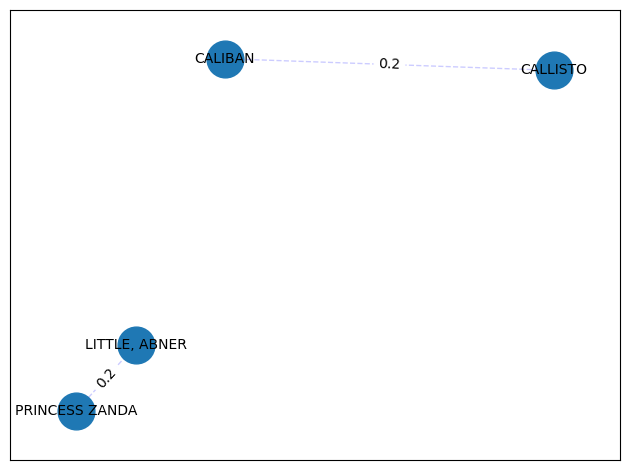

In [101]:
#PLOTTING FIRST GRAPH'S SAMPLE with the weights 

#from stackoverflow

elarge = [(u, v) for (u, v, d) in G1_sub.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G1_sub.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G1_sub, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G1_sub, pos, node_size=700)

# edges
nx.draw_networkx_edges(G1_sub, pos, edgelist=elarge, width=1)
nx.draw_networkx_edges(
    G1_sub, pos, edgelist=esmall, width=1, alpha=0.2, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G1_sub, pos, font_size=10, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G1_sub, "weight")
nx.draw_networkx_edge_labels(G1_sub, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
#plt.axis("off")
plt.tight_layout()
plt.show()

In [66]:
#hero value counts
hero_net_pp.value_counts()

hero1                 hero2                 weight  
PATRIOT/JEFF MACE     MISS AMERICA/MADELIN  0.000789    1267
MISS AMERICA/MADELIN  PATRIOT/JEFF MACE     0.001595     627
THING/BENJAMIN J. GR  HUMAN TORCH/JOHNNY S  0.002618     382
HUMAN TORCH/JOHNNY S  MR. FANTASTIC/REED R  0.002732     366
THING/BENJAMIN J. GR  MR. FANTASTIC/REED R  0.002740     365
                                                        ... 
IZANAMI               CASS, LARRY MAD DOG   1.000000       1
                      FLAME                 1.000000       1
                      GHOST RIDER III/DAN   1.000000       1
                      HARRIS, CHRISTINE     1.000000       1
ZZZAX                 WONDER MAN/SIMON WIL  1.000000       1
Length: 224099, dtype: int64

In [67]:
#Graph is created and data is validated with the sample subgraph

print("Number of unique values for the columns hero1:",hero_net_pp.hero1.unique().size, "and hero2:",hero_net_pp.hero2.unique().size)

Number of unique values for the columns hero1: 6206 and hero2: 6169


### Second graph 
The data in 'nodes.csv' and 'edges.csv' will be used to construct the second graph. The type of node (hero/comic) can be found in 'nodes.csv', and an edge between a hero node and a comic node can be found in 'edges.csv' when the hero has appeared in that specific comic.

##### This graph is assumed to be undirected and unweighted.

In [185]:
#SECOND GRAPH - G2

#splitting hero and comic nodes dataframes
hero_nodes=nodes.loc[nodes['type'] =='hero'] 
comic_nodes=nodes.loc[nodes['type'] =='comic'] 
print(hero_nodes)
print(comic_nodes)

                       node  type
3      24-HOUR MAN/EMMANUEL  hero
4      3-D MAN/CHARLES CHAN  hero
5          4-D MAN/MERCURIO  hero
6                   8-BALL/  hero
534            ABBOTT, JACK  hero
...                     ...   ...
19085           ZOTA, CARLO  hero
19086                  ZOTA  hero
19087                 ZURAS  hero
19088                  ZURI  hero
19089                 ZZZAX  hero

[6439 rows x 2 columns]
               node   type
0           2001 10  comic
1            2001 8  comic
2            2001 9  comic
7             A '00  comic
8             A '01  comic
...             ...    ...
19021  YOUNG MEN 24  comic
19022  YOUNG MEN 25  comic
19023  YOUNG MEN 26  comic
19024  YOUNG MEN 27  comic
19025  YOUNG MEN 28  comic

[12651 rows x 2 columns]


In [226]:
#Loading nodes into the graph 

G2 = nx.Graph()

G2.add_nodes_from(hero_nodes['node'], gtp='hero')
G2.add_nodes_from(comic_nodes['node'], gtp='comic')

#Loading edges into the graph 
G2 = nx.from_pandas_edgelist(edges, 'hero', 'comic', create_using=nx.Graph())

In [227]:
nx.info(G2)

C:\Users\gizem\AppData\Local\Temp\ipykernel_396\1976782796.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G2)


'Graph with 19090 nodes and 96104 edges'

In [198]:
edges

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251
...,...,...
96099,ZZZAX,H2 326
96100,ZZZAX,H2 327
96101,ZZZAX,M/CP 8/4
96102,ZZZAX,PM 47


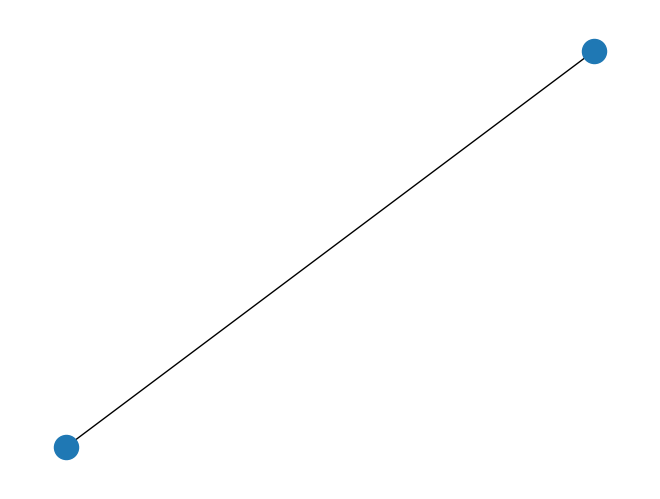

In [209]:
#subgraph to visualize a sample from Graph 2
G2_sub = nx.subgraph(G2, ['24-HOUR MAN/EMMANUEL','AA2 35'])
nx.draw(G2_sub)


## 2. Backend Implementation

### Functionality 1 - extract the graph's features

In [250]:
def func1(graphData,graphType,N):
    #Add "N" case here 
    
    d = dict() #defining a dictionary d, then function will return the dictionary d.
    
    if graphType==1:
        #The number of nodes in the network (if type 2, report for both node types)
        d['numOfNodes'] = graphData.number_of_nodes()
        
        #The number of collaborations of each superhero with the others (only if type 1)
        #for each node, we calculated number of the collabrations. And stores them into a dictionary "colab_dict"
        colab_dict=dict()
        for node in graphData.nodes():
            colab_dict[node]=len(graphData.edges(node)) #node is for hero name
        d["collabs"]= colab_dict
        
        #network density
        d["density"]=nx.density(graphData)
        
        #degree distribution   
        degree_sequence = sorted((d for n, d in graphData.degree()), reverse=True)       
        d["degreeDist"]= degree_sequence 
        
        #Divide the summation of all nodes' degree by the total number of nodes.
        d["averageDegreeofNetwork"]= sum(degree_sequence)/len(graphData.nodes())
        
        #Hubs
        threshold=np.percentile(degree_sequence, 95)
        d["networksHubs"]=[n for n, d in graphData.degree() if d > threshold]
        
        #Sparse or Dense
        d["sparseOrDense"]="dense" if d["density"]>0.5 else "sparse"
        
    if graphType==2:
        
         #The number of nodes in the network (if type 2, report for both node types)
        d['numOfNodes'] = graphData.number_of_nodes()
        
        #The number of heroes that have appeared in each comic (only if type 2)
        #d[numOfHereosInComic]=

        
        #network density
        d["density"]=nx.density(graphData)
        
        #degree distribution
        degree_sequence = sorted((d for n, d in graphData.degree()), reverse=True)
        d["degreeDist"]= degree_sequence
        
        #Divide the summation of all nodes' degree by the total number of nodes.
        d["averageDegreeofNetwork"]= sum(degree_sequence)/len(graphData.nodes())
        
        
        #Hubs 
        #Note: For this case, it makes sense to differentiate operations between the two graphs: 
        #for example: when computing hubs for the second graph, we likely care only about comics.
        threshold=np.percentile(degree_sequence, 95)
        d["networksHubs"]=[n for n, d in graphData.degree() if d > threshold]

        #Sparse or Dense
        d["sparseOrDense"]="dense" if d["density"]>0.5 else "sparse"
    
    return d


### Functionality 2 - Find top superheroes

## 3. Frontend Implementation

In [ ]:
#In the visualization part, you can use any available function (networkx functions are highly recommended).

### Visualization 1 - Visualize some features of the network

In [251]:
result1=func1(G1,1,10)

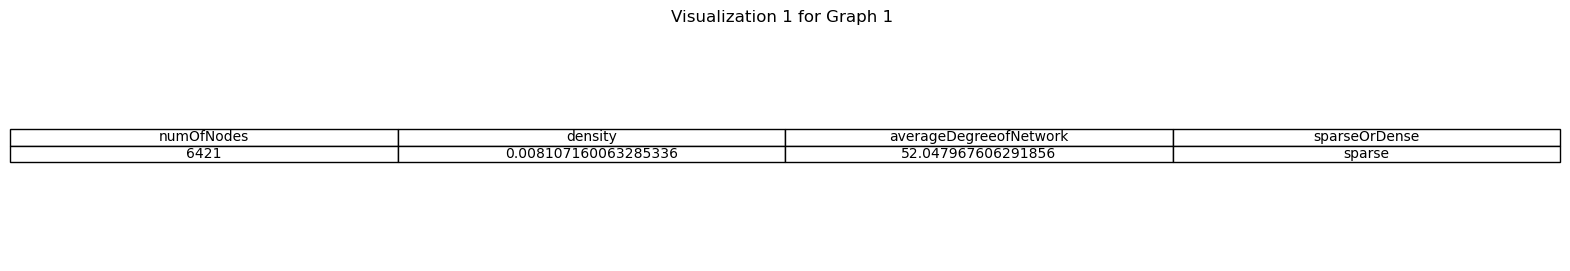

In [258]:
table1 = [[result1["numOfNodes"], result1["density"], result1["averageDegreeofNetwork"], result1["sparseOrDense"]]]

table = plt.table(cellText=table1, colLabels=['numOfNodes', 'density', 'averageDegreeofNetwork', 'sparseOrDense'], loc='center',  cellLoc='center')

plt.title('Visualization 1 for Graph 1 ')
plt.axis('off')
plt.show()

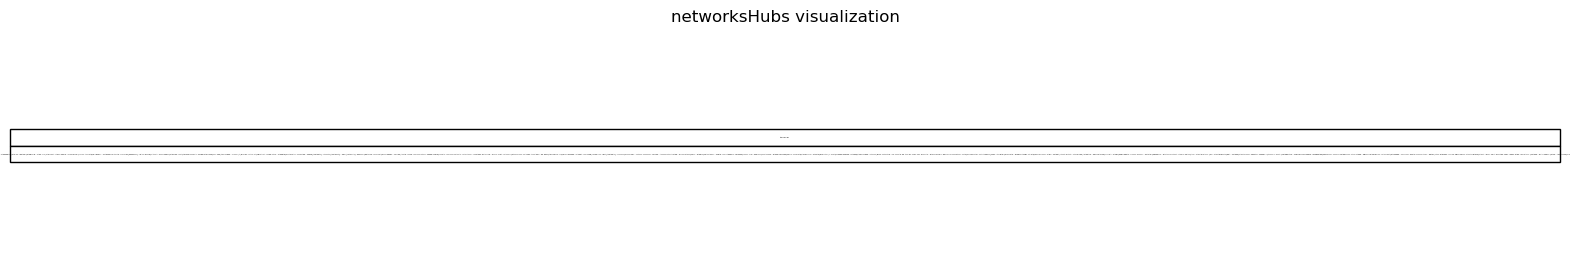

[[["BLACK PANTHER/T'CHAL",
   'IRON MAN/TONY STARK',
   'IRON MAN IV/JAMES R.',
   'ROM, SPACEKNIGHT',
   'MYSTIQUE/RAVEN DARKH',
   'BLOB/FRED J. DUKES',
   'TORPEDO III/BROCK JO',
   'PYRO/ALLERDYCE JOHNN',
   'AVALANCHE/DOMINIC PE',
   'ROGUE ',
   'DESTINY II/IRENE ADL',
   'SUB-MARINER/NAMOR MA',
   'VASHTI',
   'NOVA/RICHARD RIDER',
   'FIRESTAR/ANGELICA JO',
   'THUNDERBALL/DR. ELIO',
   'NAMORITA/NITA PRENTI',
   'SPEEDBALL/ROBBIE BAL',
   'HULK/DR. ROBERT BRUC',
   'NIGHT THRASHER/DUANE',
   'SPIDER-MAN/PETER PARKER',
   'JUSTICE II/VANCE AST',
   'TIGRA/GREER NELSON',
   'WASP/JANET VAN DYNE',
   'GALACTUS/GALAN',
   'MOCKINGBIRD/DR. BARB',
   'SILVER SURFER/NORRIN',
   'HAWK',
   'SCARLET WITCH/WANDA',
   'QUICKSILVER/PIETRO M',
   'UATU',
   'CAPTAIN AMERICA',
   'THUNDERSTRIKE/ERIC K',
   'WONDER MAN/SIMON WIL',
   'WOLVERINE/LOGAN',
   'SHE-HULK/JENNIFER WA',
   'VISION',
   'PSYLOCKE/ELISABETH B',
   'MARVEL GIRL/JEAN GRE',
   'STORM/ORORO MUNROE S',
   'ETERNITY/ADAM QA

In [264]:
table2 = [[result1["networksHubs"]]]

table = plt.table(cellText=table2, colLabels=['networksHubs'], loc='center', cellLoc='center')

plt.title('networksHubs visualization')
plt.axis('off')
plt.show()

table2

### Visualization 2 - Visualize centrality measure